# Automatic Average State Space

Vamos manipular um Boost, seguindo [essas aulas (22 à 25)](https://www.youtube.com/watch?v=yE2sfU8bIQM&list=PLbMVogVj5nJRY--U9E7dvmqgB9RhGuymk&index=19), partindo da equação de espaço de estados de grandes sinais desenvolvida, e aplicando a metodologia até chegar no modelo médio da equação de espaço de estados.

## Averaged Large Signal Model

<!-- TODO: CHEGAR AQUI!!!! -->
De alguma forma chegamos em:

\begin{align}
    A &= A_{1}\,d + A_{2}\,\left(1 - d\right) \\
    B &= B_{1}\,d + B_{2}\,\left(1 - d\right) \\
    C &= C_{1}\,d + C_{2}\,\left(1 - d\right) \\
    D &= D_{1}\,d + D_{2}\,\left(1 - d\right) \\
\end{align}

## Large Signal Models

Nossas variáveis temporais de grande sinais - $x(t),y(t),u(t)$ e $d(t)$ (representadas em letras minúsculas) podem ser decompostas em duas partes - a primeira, que representa o regime permanente (escrita em letras maiúsculas), e a segunda, que representa um pequeno sinal (identificadas pelo chapéu). O pequeno sinal é uma variação muito menor em relação ao regime permanente, ficando com:

\begin{align}
    u(t) &= U + \hat{u}(t), \:\:\:\: \mid \hat{u}(t) \ll U \\
    x(t) &= X + \hat{x}(t), \:\:\:\: \mid \hat{x}(t) \ll X \\
    y(t) &= Y + \hat{y}(t), \:\:\:\: \mid \hat{y}(t) \ll Y \\
\end{align}

Dessa forma, quando definimos nossas equações no espaço de estados:

\begin{align}
    \dot{x}(t) &= A \, x(t) + B \, u(t) \\
    y(t) &= C \, x(t) + D \, u(t)
\end{align}

Podemos substituir cada uma das variáveis temporais de grande sinais nas equações de espaço de estados média de grandes sinais, juntamente com as substituição das matrizes de espaço de estados.

\begin{align}
    \dot{X}(t) + \dot{\hat{x}}(t) &=
        \left[
            A_{1} \, d(t) + A_{2} \, \left( 1 - d(t) \right)
        \right] \left( X + \hat{x}(t) \right) +
        \left[
            B_{1} \, d(t) + B_{2} \, \left( 1 - d(t) \right)
        \right] \left( U + \hat{u}(t) \right) \\
    y(t) + \hat{y}(t) &= C \, x(t) + D \, u(t) + 
        \left[
            C_{1} \, d(t) + C_{2} \, \left( 1 - d(t) \right)
        \right] \left( X + \hat{x}(t) \right) +
        \left[
            D_{1} \, d(t) + D_{2} \, \left(1 - d(t) \right)
        \right] \left( U + \hat{u}(t) \right)
\end{align}

Substituindo $d(t) = \Delta + \hat{d}(t)$:
<!-- \left( \Delta(t) + \hat{d}(t) \right) -->
\begin{align}
    \dot{X}(t) + \dot{\hat{x}}(t) &=
        \left[
            A_{1} \, \left( \Delta(t) + \hat{d}(t) \right) + A_{2} \, \left( 1 - \left( \Delta(t) + \hat{d}(t) \right) \right)
        \right] \left( X + \hat{x}(t) \right) +
        \left[
            B_{1} \, \left( \Delta(t) + \hat{d}(t) \right) + B_{2} \, \left( 1 - \left( \Delta(t) + \hat{d}(t) \right) \right)
        \right] \left( U + \hat{u}(t) \right) \\
    y(t) + \hat{y}(t) &= C \, x(t) + D \, u(t) + 
        \left[
            C_{1} \, \left( \Delta(t) + \hat{d}(t) \right) + C_{2} \, \left( 1 - \left( \Delta(t) + \hat{d}(t) \right) \right)
        \right] \left( X + \hat{x}(t) \right) +
        \left[
            D_{1} \, \left( \Delta(t) + \hat{d}(t) \right) + D_{2} \, \left(1 - \left( \Delta(t) + \hat{d}(t) \right) \right)
        \right] \left( U + \hat{u}(t) \right)
\end{align}



Como consequência do sinal de pequenos sinais ser muito menor que o regime permanente, podemos usar uma simplificação (que trará limitações):

1. Uma multiplicação entre dois pequenos sinais pode ser desprezado, por exemplo:
$$ \left[ \hat{x}(t) \ll X , \hat{u}(t) \ll U \right] \implies \hat{x}(t) \times \hat{d}(t) = 0 $$

2. Uma segunda simplificação pode ser feita - se o regime permanente equilibrado, sua variação pode ser desprezada:
$$ \frac{d{X}(t)}{dt} = 0 \implies \dot{X}(t) = A_{k} \, X + B_{k} \, U = 0$$

Utilizando tais simplificações podemos chegar em:

\begin{align}
    \dot{\hat{x}}(t) &= A \, \hat{x}(t) + B \, \hat{u}(t) + 
        \left[ 
            \left( A_{1} - A_{2} \right) \, X +
            \left( B_{1} - B_{2} \right) \, U
        \right] \hat{d}(t) \\
    \hat{y}(t) &= C \, \hat{x}(t) + D \, \hat{u}(t) + 
        \left[
            \left( C_{1} \, - C_{2} \right) \, X +
            \left( D_{1} \, - D_{2} \right) \, U
        \right] \hat{d}(t)
\end{align}

In [385]:
import sympy as sym
from IPython.display import display, Math

sym.init_printing()

def print_ss(A, B, C, D, x, y, u):
    eq_states = sym.latex(sym.simplify(x.diff(t)))
    eq_states += " = " + sym.latex(sym.simplify(A))
    eq_states += " \, " + sym.latex(sym.simplify(x))
    eq_states += " + " + sym.latex(sym.simplify(B))
    eq_states += " \, " + sym.latex(sym.simplify(u))
    
    eq_outputs = sym.latex(sym.simplify(y))
    eq_outputs += " = " + sym.latex(sym.simplify(C))
    eq_outputs += " \, " + sym.latex(sym.simplify(x))
    eq_outputs += " + " + sym.latex(sym.simplify(D))
    eq_outputs += " \, " + sym.latex(sym.simplify(u))
    
    display(Math(eq_states))
    display(Math(eq_outputs))

# Variables
t = sym.symbols('t', constant=False, positive=True, finite=True);

# Space state dummy functions
x = sym.Function('x', finite=True)(t)  # states
y = sym.Function('y', finite=True)(t)  # output
u = sym.Function('u', finite=True)(t)  # inputs

# Space states dummy matrix variables
A, B, C, D = sym.symbols('A B C D', constant=True, commutative=False)

# Dummy standard space states equations
print_ss(A, B, C, D, x, y, u)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [386]:
# Functions
v_i = sym.Function('v_{i}', constante=False, finite=True)(t)
v_o = sym.Function('v_{o}', constante=False, finite=True)(t)
v_c = sym.Function('v_{C}', constante=False, finite=True)(t)
i_o = sym.Function('i_{o}', constante=False, finite=True)(t)
i_i = sym.Function('i_{i}', constante=False, finite=True)(t)
i_l = sym.Function('i_{L}', constante=False, finite=True)(t)

# Constants
R, C, L = sym.symbols('R C L', positive=True, constant=True)

# States, shape 'nx1' -> '2x1'
x = sym.Matrix([
    [i_l],
    [v_c],
])
# Inputs, shape 'mx1' -> '2x1'
u = sym.Matrix([
    [v_i],
    [i_o],
])
# Outputs, shape 'px1' -> '2x1'
y = sym.Matrix([
    [v_o],
    [i_i],
])

## STATE 1: MOSFET IS ON
# State Transition matrix, shape 'n,n' -> '2x2'
A1 = sym.Matrix([
    [0, 0           ],
    [0, -1 / (R * C)],
])
# Input matrix, shape 'n,m' -> '2x2'
B1 = sym.Matrix([
    [1 / L, 0     ],
    [0,     -1 / C],
])
# Output matrix, shape 'p,n' -> '2x2'
C1 = sym.Matrix([
    [0, 1],
    [1, 0],
])
# Remaining matrix, shape 'p,m' -> '2x2'
D1 = sym.Matrix([
    [0, 0],
    [0, 0],
])

## STATE 2: MOSFET IS OFF
# State Transition matrix, shape 'n,n' -> '2x2'
A2 = sym.Matrix([
    [0,   -1 / L      ],
    [1/C, -1 / (R * C)],
])
# Input matrix, shape 'n,m' -> '2x2'
B2 = sym.Matrix([
    [1 / L, 0     ],
    [0,     -1 / C],
])
# Output matrix, shape 'p,n' -> '2x2'
C2 = C1
# Remaining matrix, shape 'p,m' -> '2x2'
D2 = D1


# Display the equations
print("For the first state (swtich is ON):")
print_ss(A1, B1, C1, D1, x, y, u)
print("For the second state (switch is OFF):")
print_ss(A2, B2, C2, D2, x, y, u)

For the first state (swtich is ON):


<IPython.core.display.Math object>

<IPython.core.display.Math object>

For the second state (switch is OFF):


<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Averaged Large Signal Model

By weightening the subsystems's $A, B, C, D$ equations with its correspondent periods (which can be written as $D$ and $(1 - D)$ because of our PWM modulation), we have the Averaged Large Signal Model


<IPython.core.display.Math object>

<IPython.core.display.Math object>

By defining the large signal as a sum of the small-signal with the steady-state:


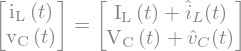

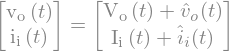

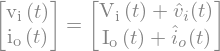

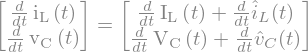

We end up with:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [387]:
print("By weightening the subsystems's $A, B, C, D$ equations with its correspondent periods "
      "(which can be written as $D$ and $(1 - D)$ because of our PWM modulation), "
      "we have the Averaged Large Signal Model")
dt = sym.Function('d')(t)

def get_averaged_large_signal_model(A1, B1, C1, D1, A2, B2, C2, D2, x, y, u, dt):
    A = A1 * (dt) + A2 * (1 - dt)
    B = B1 * (dt) + B2 * (1 - dt)
    C = C1 * (dt) + C2 * (1 - dt)
    D = D1 * (dt) + D2 * (1 - dt)
    return A, B, C, D, x, y, u

A, B, C, D, x, y, u = get_averaged_large_signal_model(A1, B1, C1, D1, A2, B2, C2, D2, x, y, u, dt)

print_ss(A, B, C, D, x, y, u)

# large-signal
dx = x.diff(t)

# Steady-state, let's consider it not constant, just to not be zeroed when differentiated.
V_i = sym.Function('V_{i}', constant=False, finite=True)(t)
V_o = sym.Function('V_{o}', constant=False, finite=True)(t)
V_c = sym.Function('V_{C}', constant=False, finite=True)(t)
I_o = sym.Function('I_{o}', constant=False, finite=True)(t)
I_i = sym.Function('I_{i}', constant=False, finite=True)(t)
I_l = sym.Function('I_{L}', constant=False, finite=True)(t)
Dt = sym.Function('\Delta', constant=False, finite=True)(t)
subs = {
    v_i: V_i,
    v_o: V_o,
    v_c: V_c,
    i_o: I_o,
    i_i: I_i,
    i_l: I_l,
    dt: Dt,
}
X = x.subs(subs)
Y = y.subs(subs)
U = u.subs(subs)
dX = X.diff(t)

# small-signal
hv_i = sym.Function('\hat{v}_{i}', finite=True)(t)
hv_o = sym.Function('\hat{v}_{o}', finite=True)(t)
hv_c = sym.Function('\hat{v}_{C}', finite=True)(t)
hi_o = sym.Function('\hat{i}_{o}', finite=True)(t)
hi_i = sym.Function('\hat{i}_{i}', finite=True)(t)
hi_l = sym.Function('\hat{i}_{L}', finite=True)(t)
hdt = sym.Function('\hat{d}', finite=True)(t)
hsubs = {
    v_i: hv_i,
    v_o: hv_o,
    v_c: hv_c,
    i_o: hi_o,
    i_i: hi_i,
    i_l: hi_l,
    dt: hdt,
}
hx = x.subs(hsubs)
hy = y.subs(hsubs)
hu = u.subs(hsubs)
hdx = hx.diff(t)

eq_x = sym.Eq(x, X + hx)
eq_y = sym.Eq(y, Y + hy)
eq_u = sym.Eq(u, U + hu)
eq_dx = sym.Eq(dx, dX + hdx)
eq_dt = sym.Eq(dt, Dt + hdt)

A = A.subs({dt: eq_dt.rhs})
B = B.subs({dt: eq_dt.rhs})
C = C.subs({dt: eq_dt.rhs})
D = D.subs({dt: eq_dt.rhs})

print("By defining the large signal as a sum of the small-signal with the steady-state:")

display(eq_x)
display(eq_y)
display(eq_u)
display(eq_dx)
display(eq_dt)

print("We end up with:")
print_ss(A, B, C, D, eq_x.rhs, eq_y.rhs, eq_u.rhs)

## Steady State Model
Para termos o modelo de regime permanente, substituímos as equações de grandes sinais no modelo de grandes sinais, e considerando que em regime permanente as variações são despresíveis, simplificamos o modelo até ficarmos apenas com simples relações entre constantes.

Substituímos as equações de grande sinais:
\begin{align}
    u(t) &= U + \hat{u}(t), \:\:\:\: \mid \hat{u}(t) \ll U \\
    x(t) &= X + \hat{x}(t), \:\:\:\: \mid \hat{x}(t) \ll X \\
    y(t) &= Y + \hat{y}(t), \:\:\:\: \mid \hat{y}(t) \ll Y \\
\end{align}

No modelo de grandes sinais:
\begin{align}
    \dot{x}(t) &= A \, x(t) + B \, u(t) \\
    y(t) &= C \, x(t) + D \, u(t)
\end{align}

Considerando que a variação do sinal dos estados pode ser despresada em regime permanente:
$$ \frac{d{X}(t)}{dt} = 0 \implies \dot{X}(t) = A_{k} \, X + B_{k} \, U = 0$$

Resolvendo para $X$:
$$ X = -A^{-1} B U $$

E substituindo em $Y$, finalmente chegamos em:
$$ Y = C \left[ -A^{-1} B U \right] + D U $$


Que pode ser trabalhado para encontrar quaisquer relações de regime permanente.

Recapitulating, the Averaged Large-signal model is:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

If we consider that all steady-state functions are constants, it's derivatives are zero, so:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

And if we are considering the steady state, all small-signals can be neglected:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Than we solve the states equation for X and substitute it in the outputs equation:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

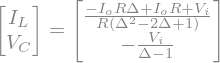

The outputs equation:


<IPython.core.display.Math object>

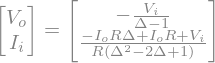

Which can be solved to give us the DC gains, and the ports relationships, as follows:


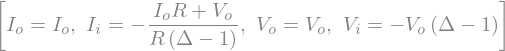

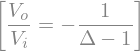

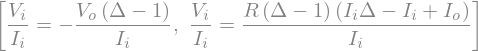

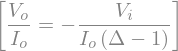

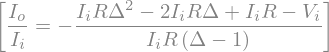

In [410]:
A, B, C, D, x, y, u = get_averaged_large_signal_model(A1, B1, C1, D1, A2, B2, C2, D2, x, y, u, dt)

print("Recapitulating, the Averaged Large-signal model is:")
print_ss(A, B, C, D, X + hx, Y + hy, U + hu)

print("If we consider that all steady-state functions are constants, it's derivatives are zero, so:")
# steady-state, now we consider it to be constants, so it will be zeroed when differentiated.

V_i = sym.Symbol('V_{i}', constant=True, finite=True)
V_o = sym.Symbol('V_{o}', constant=True, finite=True)
V_c = sym.Symbol('V_{C}', constant=True, finite=True)
I_o = sym.Symbol('I_{o}', constant=True, finite=True)
I_i = sym.Symbol('I_{i}', constant=True, finite=True)
I_l = sym.Symbol('I_{L}', constant=True, finite=True)
Dt = sym.Symbol('\Delta', constant=True, finite=True)
subs = {
    v_i: V_i,
    v_o: V_o,
    v_c: V_c,
    i_o: I_o,
    i_i: I_i,
    i_l: I_l,
    dt: Dt,
}
X = x.subs(subs)
Y = y.subs(subs)
U = u.subs(subs)
dX = X.diff(t)

eq_x = sym.Eq(x, X + hx)
eq_y = sym.Eq(y, Y + hy)
eq_u = sym.Eq(u, U + hu)
eq_dx = sym.Eq(dx, dX + hdx)
eq_dt = sym.Eq(dt, Dt + hdt)

A = A.subs({dt: eq_dt.rhs})
B = B.subs({dt: eq_dt.rhs})
C = C.subs({dt: eq_dt.rhs})
D = D.subs({dt: eq_dt.rhs})

print_ss(A, B, C, D, eq_x.rhs, eq_y.rhs, eq_u.rhs)

print("And if we are considering the steady state, all small-signals can be neglected:")

A, B, C, D, x, y, u = get_averaged_large_signal_model(A1, B1, C1, D1, A2, B2, C2, D2, x, y, u, dt)

# small-signal
hv_i = sym.Function('\hat{v}_{i}', finite=True)(t)
hv_o = sym.Function('\hat{v}_{o}', finite=True)(t)
hv_c = sym.Function('\hat{v}_{C}', finite=True)(t)
hi_o = sym.Function('\hat{i}_{o}', finite=True)(t)
hi_i = sym.Function('\hat{i}_{i}', finite=True)(t)
hi_l = sym.Function('\hat{i}_{L}', finite=True)(t)
hdt = sym.Function('\hat{d}', finite=True)(t)
hsubs = {
    v_i: hv_i*0,
    v_o: hv_o*0,
    v_c: hv_c*0,
    i_o: hi_o*0,
    i_i: hi_i*0,
    i_l: hi_l*0,
    dt: hdt*0,
}
hx = x.subs(hsubs)
hy = y.subs(hsubs)
hu = u.subs(hsubs)
hdx = hx.diff(t)

eq_x = sym.Eq(x, X + hx)
eq_y = sym.Eq(y, Y + hy)
eq_u = sym.Eq(u, U + hu)
eq_dx = sym.Eq(dx, dX + hdx)
eq_dt = sym.Eq(dt, Dt + hdt).subs({hdt: 0})

A = A.subs({dt: eq_dt.rhs})
B = B.subs({dt: eq_dt.rhs})
C = C.subs({dt: eq_dt.rhs})
D = D.subs({dt: eq_dt.rhs})

print_ss(A, B, C, D, eq_x.rhs, eq_y.rhs, eq_u.rhs)

print("Than we solve the states equation for X and substitute it in the outputs equation:")
display(Math("X = -A^{-1} B U"))

X_eq = sym.latex(X) + " = " + "-" + sym.latex(A) + "^{-1}" + " \, " + sym.latex(B) + " \, " + sym.latex(U)
display(Math(X_eq))
X_eq = sym.latex(X) + " = " + sym.latex(-A.inv()) + " \, " + sym.latex(B) + " \, " + sym.latex(U)
display(Math(X_eq))
X_eq = sym.latex(X) + " = " + sym.latex((-A.inv() * B).expand()) + " \, " + sym.latex(U)
display(Math(X_eq))

X_eq = sym.Eq(A * eq_x.rhs, -B * eq_u.rhs).subs(subs)
X_eq = sym.Eq(X, A.LUsolve(X_eq.rhs).expand().simplify())
display(X_eq)
print("The outputs equation:")
# display(Math("Y + \hat{y}(t) = C \\left(X + \hat{x}\\right) + D \\left(U + \hat{u}\\right) \implies Y = C \\left(\\left[ -A^{-1} B U \\right] + \hat{x}\\right) + D \\left(U + \hat{u}\\right) - \hat{y}"))
display(Math("Y = C X + D U = C \\left[ -A^{-1} B U \\right] + D U "))

#TODO: Show step-by-step like we did with X_eq
# Y_eq = sym.latex(X) + " = " + sym.latex((-A.inv() * B).expand()) + " \, " + sym.latex(U)
# display(Y_eq)

Y_eq = sym.Eq(Y, C * (X_eq.rhs) + D * (eq_u.rhs) -hy).expand().simplify()
display(Y_eq)

print("Which can be solved to give us the DC gains, and the ports relationships, as follows:")

def matrix_eq_to_system_of_linear_eq(matrix_eq):
    return [sym.Eq(matrix_eq.lhs[r], matrix_eq.rhs[r]) for r in range(matrix_eq.lhs.rows)]

def get_transfer_function(lin_eqs, num, den):
    H = sym.Symbol('H')
    _num = H * den
    result = []
    for eq in lin_eqs:
        tf = sym.solve(eq.subs({num: _num}), H)
        result.append(tf)
    result = filter(None, result)
    flatten = sum([*result], [])
    result = []
    for expr in flatten:
        result.append(sym.Eq(num / den, expr.expand().factor(deep=True)))
    return result

def solve_linear_system_of_equations(lin_eqs, Y, U):
    _vars = list(set([*Y.free_symbols, *U.free_symbols]))
    result = sym.nonlinsolve(lin_eqs, _vars)
    simpler = []
    for eq_set in result:
        for i, eq in enumerate(eq_set):
            simpler.append(sym.Eq(_vars[i], eq.expand().factor(deep=True), evaluate=False))
    return simpler

def get_averaged_steady_state_solution(A1, B1, C1, D1, A2, B2, C2, D2, X, Y, U, Dt):
    return sym.Eq(Y, C * (-A.inv() * B * U) + D * U).expand().simplify()

Y_eq = get_averaged_steady_state_solution(A1, B1, C1, D1, A2, B2, C2, D2, X, Y, U, Dt)
lin_eqs = matrix_eq_to_system_of_linear_eq(Y_eq)
display(solve_linear_system_of_equations(lin_eqs, Y, U))
display(get_transfer_function(lin_eqs, V_o, V_i))
display(get_transfer_function(lin_eqs, V_i, I_i))
display(get_transfer_function(lin_eqs, V_o, I_o))
display(get_transfer_function(lin_eqs, I_o, I_i))

## Small-signal Model

\begin{align}
    \dot{\hat{x}}(t) &= A \, \hat{x}(t) + B \, \hat{u}(t) + 
        \left[ 
            \left( A_{1} - A_{2} \right) \, X +
            \left( B_{1} - B_{2} \right) \, U
        \right] \hat{d}(t) \\
    \hat{y}(t) &= C \, \hat{x}(t) + D \, \hat{u}(t) + 
        \left[
            \left( C_{1} \, - C_{2} \right) \, X +
            \left( D_{1} \, - D_{2} \right) \, U
        \right] \hat{d}(t)
\end{align}

In [389]:
print("Recapitulating, the Averaged Large-signal model is:")

A, B, C, D, x, y, u = get_averaged_large_signal_model(A1, B1, C1, D1, A2, B2, C2, D2, x, y, u, dt)

# small-signal
hv_i = sym.Function('\hat{v}_{i}', finite=True)(t)
hv_o = sym.Function('\hat{v}_{o}', finite=True)(t)
hv_c = sym.Function('\hat{v}_{C}', finite=True)(t)
hi_o = sym.Function('\hat{i}_{o}', finite=True)(t)
hi_i = sym.Function('\hat{i}_{i}', finite=True)(t)
hi_l = sym.Function('\hat{i}_{L}', finite=True)(t)
hdt = sym.Function('\hat{d}', finite=True)(t)
hsubs = {
    v_i: hv_i,
    v_o: hv_o,
    v_c: hv_c,
    i_o: hi_o,
    i_i: hi_i,
    i_l: hi_l,
    dt: hdt,
}
hx = x.subs(hsubs)
hy = y.subs(hsubs)
hu = u.subs(hsubs)
hdx = hx.diff(t)

V_i = sym.Function('V_{i}', finite=True)(t)
V_o = sym.Function('V_{o}', finite=True)(t)
V_c = sym.Function('V_{C}', finite=True)(t)
I_o = sym.Function('I_{o}', finite=True)(t)
I_i = sym.Function('I_{i}', finite=True)(t)
I_l = sym.Function('I_{L}', finite=True)(t)
Dt = sym.Function('\Delta', finite=True)(t)
subs = {
    v_i: V_i,
    v_o: V_o,
    v_c: V_c,
    i_o: I_o,
    i_i: I_i,
    i_l: I_l,
    dt: Dt,
}
X = x.subs(subs)
Y = y.subs(subs)
U = u.subs(subs)
dX = X.diff(t)

eq_x = sym.Eq(x, X + hx)
eq_y = sym.Eq(y, Y + hy)
eq_u = sym.Eq(u, U + hu)
eq_dx = sym.Eq(dx, dX + hdx)
eq_dt = sym.Eq(dt, Dt + hdt)

A = A.subs({dt: eq_dt.rhs})
B = B.subs({dt: eq_dt.rhs})
C = C.subs({dt: eq_dt.rhs})
D = D.subs({dt: eq_dt.rhs})

print_ss(A, B, C, D, eq_x.rhs, eq_y.rhs, eq_u.rhs)

print("If the steady-state signals are constant, therefore the derivative of the states is zero:")

A, B, C, D, x, y, u = get_averaged_large_signal_model(A1, B1, C1, D1, A2, B2, C2, D2, x, y, u, dt)

V_i = sym.Symbol('V_{i}', constant=True, finite=True)
V_o = sym.Symbol('V_{o}', constant=True, finite=True)
V_c = sym.Symbol('V_{C}', constant=True, finite=True)
I_o = sym.Symbol('I_{o}', constant=True, finite=True)
I_i = sym.Symbol('I_{i}', constant=True, finite=True)
I_l = sym.Symbol('I_{L}', constant=True, finite=True)
Dt = sym.Symbol('\Delta', constant=True, finite=True)
subs = {
    v_i: V_i,
    v_o: V_o,
    v_c: V_c,
    i_o: I_o,
    i_i: I_i,
    i_l: I_l,
    dt: Dt,
}
X = x.subs(subs)
Y = y.subs(subs)
U = u.subs(subs)
dX = X.diff(t)

eq_x = sym.Eq(x, X + hx)
eq_y = sym.Eq(y, Y + hy)
eq_u = sym.Eq(u, U + hu)
eq_dx = sym.Eq(dx, dX + hdx)
eq_dt = sym.Eq(dt, Dt + hdt)

A = A.subs({dt: eq_dt.rhs})
B = B.subs({dt: eq_dt.rhs})
C = C.subs({dt: eq_dt.rhs})
D = D.subs({dt: eq_dt.rhs})

print_ss(A, B, C, D, eq_x.rhs, eq_y.rhs, eq_u.rhs)
print("To solve this, we can expand the matrix multiplication into each term relative to hats and non-hats:")
# A simple way to do this is by zeroing the part we don't want to gather:
hat_A = sym.ImmutableDenseMatrix(A.subs({Dt: 0}) - A.subs({Dt: 0, hdt: 0})).expand().simplify()
hat_B = sym.ImmutableDenseMatrix(B.subs({Dt: 0}) - B.subs({Dt: 0, hdt: 0})).expand().simplify()
steady_A = sym.ImmutableDenseMatrix(A.subs({hdt: 0})).expand().simplify()
steady_B = sym.ImmutableDenseMatrix(B.subs({hdt: 0})).expand().simplify()

X_eq = sym.latex(eq_dx.rhs) + " = " + (
    r"\left\{" + sym.latex(steady_A) + " \, " + sym.latex(eq_x.rhs) + r"\right\}" + " + " + 
    r"\left\{" + sym.latex(hat_A) + " \, " + sym.latex(eq_x.rhs) + r"\right\}" + " + " + 
    r"\left\{" + sym.latex(B) + " \, " + sym.latex(eq_u.rhs) + r"\right\}"
)
display(Math(X_eq))

X_eq = r"\begin{aligned}" + sym.latex(eq_dx.rhs) + (
    " &{}= " + r"\left\{" + sym.latex(steady_A) + " \, " + sym.latex(X) + r"\right\}" + 
    "  +   " + r"\left\{" + sym.latex(steady_A) + " \, " + sym.latex(hx) + r"\right\}" + r"\\" +
    " &+   " + r"\left\{" + sym.latex(hat_A)    + " \, " + sym.latex(X) + r"\right\}" + 
    "  +   " + r"\left\{" + sym.latex(hat_A)    + " \, " + sym.latex(hx) + r"\right\}" + r"\\" +
    " &+   " + r"\left\{" + sym.latex(steady_B) + " \, " + sym.latex(U) + r"\right\}" +
    "  +   " + r"\left\{" + sym.latex(steady_B) + " \, " + sym.latex(hu) + r"\right\}" + r"\\" +
    " &+   " + r"\left\{" + sym.latex(hat_B)    + " \, " + sym.latex(U) + r"\right\}" +
    "  +   " + r"\left\{" + sym.latex(hat_B)    + " \, " + sym.latex(hu) + r"\right\}"
) + r"\end{aligned}"
display(Math(X_eq))

X_eq = r"\begin{aligned}" + sym.latex(eq_dx.rhs) + (
    " &{}= " + r"\left\{" + sym.latex(steady_A) + " \, " + sym.latex(X) + r"\right\}" + 
    "  +   " + r"\left\{" + sym.latex(steady_B) + " \, " + sym.latex(U) + r"\right\}" + r"\\" +
    " &+   " + r"\left\{" + sym.latex(steady_A) + " \, " + sym.latex(hx) + r"\right\}" +
    "  +   " + r"\left\{" + sym.latex(steady_B) + " \, " + sym.latex(hu) + r"\right\}" + r"\\" +
    " &+   " + r"\left\{" + sym.latex(hat_A)    + " \, " + sym.latex(X) + r"\right\}" + 
    "  +   " + r"\left\{" + sym.latex(hat_B)    + " \, " + sym.latex(U) + r"\right\}" + r"\\" +
    " &+   " + r"\left\{" + sym.latex(hat_A)    + " \, " + sym.latex(hx) + r"\right\}" +
    "  +   " + r"\left\{" + sym.latex(hat_B)    + " \, " + sym.latex(hu) + r"\right\}"
) + r"\end{aligned}"
display(Math(X_eq))

print("We can use the great common denominator to get the small-signal duty-cycle term out of the A and B matrices:")

def gcd(matrix):
    return sym.gcd(tuple(matrix)).expand()

def simplify_gcd(matrix):
    return (matrix / gcd(matrix)).expand()

def check_in(matrix, elem):
    return elem in [*matrix.atoms(sym.Function), *matrix.atoms(sym.Symbol)]

X_eq = r"\begin{aligned}" + sym.latex(eq_dx.rhs) + (
    " &{}= " + r"\left\{" + sym.latex(steady_A) + " \, " + sym.latex(X) + r"\right\}" + 
    "  +   " + r"\left\{" + sym.latex(steady_B) + " \, " + sym.latex(U) + r"\right\}" + r"\\" +
    " &+   " + r"\left\{" + sym.latex(steady_A) + " \, " + sym.latex(hx) + r"\right\}" +
    "  +   " + r"\left\{" + sym.latex(steady_B) + " \, " + sym.latex(hu) + r"\right\}" + r"\\" +
    " &+   " + r"\left\{" + sym.latex(simplify_gcd(hat_A)) + " \, " + sym.latex(X)  + sym.latex(gcd(hat_A)) + r"\right\}" + 
    "  +   " + r"\left\{" + sym.latex(simplify_gcd(hat_B)) + " \, " + sym.latex(U)  + sym.latex(gcd(hat_B)) + r"\right\}" + r"\\" +
    " &+   " + r"\left\{" + sym.latex(simplify_gcd(hat_A)) + " \, " + sym.latex(hx) + sym.latex(gcd(hat_A)) + r"\right\}" +
    "  +   " + r"\left\{" + sym.latex(simplify_gcd(hat_B)) + " \, " + sym.latex(hu) + sym.latex(gcd(hat_B)) + r"\right\}"
) + r"\end{aligned}"
display(Math(X_eq))

print("Now, by Recapitulating that:")

display(Math(
    "\dot{X} = 0 = A X + B U = " + sym.latex(steady_A) + " \, " + sym.latex(X) + " + " + sym.latex(steady_B) + " \, " + sym.latex(U)
))

print("And also that the multiplication of two small signals can be considered as zero:")

X_eq = r"\begin{aligned}" + sym.latex(eq_dx.rhs) + (
    " &{}= " + r"\xcancel{" + r"\left\{" + sym.latex(steady_A) + " \, " + sym.latex(X) + r"\right\}" + 
    "  +   " + r"\left\{" + sym.latex(steady_B) + " \, " + sym.latex(U) + r"\right\}" + r"}" + r"\\" +
    " &+   " + r"\left\{" + sym.latex(steady_A) + " \, " + sym.latex(hx) + r"\right\}" +
    "  +   " + r"\left\{" + sym.latex(steady_B) + " \, " + sym.latex(hu) + r"\right\}" + r"\\" +
    " &+   " + r"\left\{" + sym.latex(simplify_gcd(hat_A)) + " \, " + sym.latex(X)  + sym.latex(gcd(hat_A)) + r"\right\}" + 
    "  +   " + r"\left\{" + sym.latex(simplify_gcd(hat_B)) + " \, " + sym.latex(U)  + sym.latex(gcd(hat_B)) + r"\right\}" + r"\\" +
    " &+   " + r"\xcancel{" + r"\left\{" + sym.latex(simplify_gcd(hat_A)) + " \, " + sym.latex(hx) + sym.latex(gcd(hat_A)) + r"\right\}" +
    "  +   " + r"\left\{" + sym.latex(simplify_gcd(hat_B)) + " \, " + sym.latex(hu) + sym.latex(gcd(hat_B)) + r"\right\}" + r"}"
) + r"\end{aligned}"
display(Math(X_eq))

print("Now we group the states X and inputs U:")

X_eq = r"\begin{aligned}" + sym.latex(eq_dx.rhs) + (
    " &+   " + r"\left\{" + sym.latex(steady_A) + " \, " + sym.latex(hx) + r"\right\}" +
    "  +   " + r"\left\{" + sym.latex(steady_B) + " \, " + sym.latex(hu) + r"\right\}" + r"\\" +
    " &+   " + r"\left\{" + sym.latex(simplify_gcd(hat_A)) + " \, " + sym.latex(X)  + sym.latex(gcd(hat_A)) + r"\right\}" + 
    "  +   " + r"\left\{" + sym.latex(simplify_gcd(hat_B)) + " \, " + sym.latex(U)  + sym.latex(gcd(hat_B)) + r"\right\}" + r"\\"
) + r"\end{aligned}"
display(Math(X_eq))

X_eq = r"\begin{aligned}" + sym.latex(eq_dx.rhs) + (
    " &+   " + r"\left\{" + sym.latex(steady_A) + " \, " + sym.latex(hx) + r"\right\}" +
    "  +   " + r"\left\{" + sym.latex(steady_B) + " \, " + sym.latex(hu) + " + " + sym.latex(simplify_gcd(hat_A) * X) + " \, " + sym.latex(gcd(hat_A)) + r"\right\}"
) + r"\end{aligned}"
display(Math(X_eq))

print("To get the canonical form, we can rearange the outputs as:")

_hu = sym.Matrix([
    [hu],
    [gcd(hat_A) * sym.Matrix([1])]
])

_B = sym.Matrix([
    [steady_B, simplify_gcd(hat_A) * X],
])

X_eq = r"\begin{aligned}" + sym.latex(eq_dx.rhs) + (
    " &+   " + sym.latex(steady_A) + " \, " + sym.latex(hx) +
    "  +   " + sym.latex(_B) + " \, " + sym.latex(_hu)
) + r"\end{aligned}"
display(Math(X_eq))

Recaptulating, the Averaged Large-signal model is:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

If the steady-state signals are constant, therefore the derivative of the states is zero:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

To solve this, we can expand the matrix multiplication into each term relative to hats and non-hats:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

We can use the great common denominator to get the small-signal duty-cycle term out of the A and B matrices:


<IPython.core.display.Math object>

Now, by recaptulating that:


<IPython.core.display.Math object>

And also that the multiplication of two small signals can be considered as zero:


<IPython.core.display.Math object>

Now we group the states X and inputs U:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

To get the canonical form, we can rearange the outputs as:


<IPython.core.display.Math object>

In [390]:
def get_averaged_small_signal_model(A1, B1, C1, D1, A2, B2, C2, D2, X, Y, U, Dt, hx, hy, hu, hdt):
    A = A1 * (Dt) + A2 * (1 - Dt)
    C = C1 * (Dt) + C2 * (1 - Dt)
    
    hu = sym.Matrix([
        [hu],
        [hdt]
    ])

    B = sym.Matrix([
        [B1 * Dt + B2 * (1 - Dt), (A1 - A2) * X + (B1 - B2) * U],
    ])

    D = sym.Matrix([
        [D1 * Dt + D2 * (1 - Dt), (C1 - C2) * X + (D1 - D2) * U],
    ])

    return A, B, C, D, hx, hy, hu

print_ss(*get_averaged_small_signal_model(A1, B1, C1, D1, A2, B2, C2, D2, X, Y, U, Dt, hx, hy, hu, hdt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>